In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# 이진 분류 예측 모델 
# 사용할 알고리즘 : LogisticRegression
from sklearn.linear_model import LogisticRegression

# 데이터 정규화(표준화)
# 평균 0, 분산 1 인 정규분포를 따르는 값으로 변환
from sklearn.preprocessing import StandardScaler

# 학습데이터, 테스트데이터 분리
from sklearn.model_selection import train_test_split

# 성능 평가
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import confusion_matrix # 오차행렬
from sklearn.metrics import precision_score # 정밀도 점수
from sklearn.metrics import recall_score # 재현율 점수
from sklearn.metrics import precision_recall_curve # 
from sklearn.metrics import f1_score # 정밀도, 재현율 조합
from sklearn.metrics import roc_curve # 곡선 
from sklearn.metrics import roc_auc_score # 면적값

In [8]:
# 데이터 로딩 (피마인디언 데이터 당뇨병)
d_data = pd.read_csv('D:/shinj/Data/[4]pima-Indians/diabetes.csv')

In [9]:
# 당뇨병 분포 확인 
# 불균형 데이터 셋
# 0    500
# 1    268
d_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
d_data.head(3)
# 값의 크기 차이 심하다 => 표준화 필요

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [11]:
# 결측치 확인 X
# 데이터 타입 : object (string) => encoder X
d_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
# 데이터와 답을 분리
# iloc[행,열] : 숫인덱스로 행접근 
# loc[행, 열] : 명인덱스로 행접근
X =  d_data.iloc[ : , : -1]# 데이터
# X = d_data.drop('Outcome', axis=1)
y =  d_data.iloc[ : , -1]# 답
# y = d_data['Outcome']

In [13]:
X.iloc[:3,:] # 3행, 모든 컬럼

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [14]:
# 정확도, 오차행렬, 정밀도, 재현율, f1점수, auc점수 함수
def get_clf_aval(y_test=None, pred=None):
    '''
    y_test : 원래답
    pred : 예측값
    '''
    confusion = confusion_matrix(y_test, pred) # 오차행렬
    accu = accuracy_score(y_test, pred) # 정확도
    precision = precision_score(y_test, pred) # 정밀도
    recall = recall_score(y_test, pred) # 재현율
    f1 = f1_score(y_test, pred) # 정밀도, 재현율 조화평균
    roc_auc = roc_auc_score(y_test, pred) # 중요한 평가 지표
    
    print('오차행렬')
    print(confusion)
    # 평가지표 출력
    output = '정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'
    print(output.format(accu, precision, recall, f1, roc_auc))

In [15]:
# 임계값 확인 시각화 함수
# parameter : 원래값, 예측값 확률
def precision_recall_curve_plot(y_test=None, pred_proba_p=None):
    # 정밀도, 재현율, 임계값 튜플로 반환
    precisions, recalls, ths = \
    precision_recall_curve(y_test, pred_proba_p)
    
    # X축 : 임계값(ths), Y축 : 정밀도(precisions), 재현율
    plt.figure(figsize=(6,4))
    ths_boundary = ths.shape[0]
    # 정밀도 표시
    plt.plot(
          ths  # X 축
        , precisions[0:ths_boundary] # Y축
        , linestyle='--' # 점선
        , label='precision'
    )
    # 재현율 표시
    plt.plot(
          ths  # X 축
        , recalls[0:ths_boundary] # Y축
        , label='recall'
    )
    
    # X축 스케일 조정 => 원래스케일 : 0.2 단위 => 0.1 단위변경
    start, end = plt.xlim()
    plt.xticks(
        np.round(
            np.arange(start,end, 0.1), 2
        ) 
    )
    plt.legend() # 범례 표시
    plt.grid() # 그리드 표시
    plt.show()

In [16]:
# 학습데이터와 테스트데이터 분리
#  X_train(학습데이터), X_test(테스트데이터)
#  y_train(학습데이터의 답), y_test(테스트데이터 답)
X_train, X_test, y_train, y_test = \
train_test_split(
      X  # 분리할 데이터
    , y  # 분리할 답
    , test_size=0.2 # 분리될 테스트데이터 크기
    , random_state=0 # 랜덤하게 추출해서 분리
)

In [17]:
# 로지스틱 회귀 (분류모델) 객체 생성
lr_clf = LogisticRegression()

# 학습해서 모델 생성
lr_clf.fit(X_train, y_train)

# 테스트데이터에 대한 예측 값 추출
pred = lr_clf.predict(X_test)

# 성능 평가
get_clf_aval(y_test, pred)

오차행렬
[[98  9]
 [18 29]]
정확도 : 0.8247, 정밀도 : 0.7632, 재현율 : 0.6170, F1 : 0.6824, AUC : 0.7665


C:\Users\shinj\anaconda3\envs\ML\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


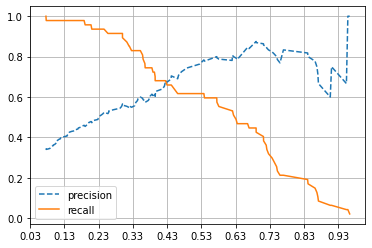

In [18]:
# 시각화 
# y_test : 원래답 , pred_proba_p: 예측값이 1이 나올 확률
# precision_recall_curve_plot(y_test=None, pred_proba_p=None)
# pred_proba_p 값 구하기
# predict_proba() : 예측 확률 반환 (0일 확률, 1일 확률)
pred_proba_v = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba_v)

In [19]:
# 정확도 : 0.8247, 정밀도 : 0.7632, 재현율 : 0.6170
# , F1 : 0.6824, AUC : 0.7665
# 성능 향상 
# 1. 알고리즘(LogisticRegression) 튜닝 : 하이퍼파라미터 조절
# 2. 알고리즘 변경
# 3. 데이터 전처리 
# 데이터 분포
d_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

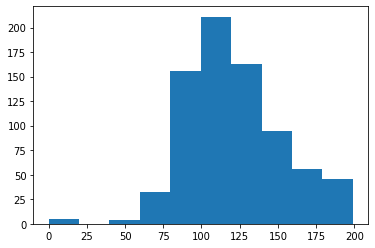

In [20]:
# 포토당 : 데이터 분포 시각화
plt.hist(
      d_data['Glucose'] # 데이터
    , bins = 10 # 분리할 개수
)

In [21]:
# 컬럼별로 0 값의 비율 확인
# 0 개수 / 전체개수
zero_features = [
    'Glucose', 'BloodPressure', 'SkinThickness'
    , 'Insulin', 'BMI'
]

# 전체 데이터 개수
total_count = d_data['Glucose'].count()

# 컬럼별 0의 비율 출력
for feature in zero_features:
    # 컬럼별 0의 개수
    zero_count = d_data[d_data[feature]==0][feature].count()
    zero_rate = zero_count/ total_count * 100
    output_str = '{0} 컬럼의 0의 개수 {1}, 비율 {2:.2f} %'
    print(output_str.format(feature, zero_count, zero_rate))

Glucose 컬럼의 0의 개수 5, 비율 0.65 %
BloodPressure 컬럼의 0의 개수 35, 비율 4.56 %
SkinThickness 컬럼의 0의 개수 227, 비율 29.56 %
Insulin 컬럼의 0의 개수 374, 비율 48.70 %
BMI 컬럼의 0의 개수 11, 비율 1.43 %


In [22]:
# 각 컬럼의 평균값 저장하는 변수 선언
zero_features = [
    'Glucose', 'BloodPressure', 'SkinThickness'
    , 'Insulin', 'BMI'
]
mean_zero_features = d_data[zero_features].mean()
mean_zero_features

Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64

In [23]:
# 각각의 컬럼의 0값을 각 컬럼의 평균 대체(replace)
# replace(찾을값, 변경값)
d_data[zero_features] = \
d_data[zero_features].replace(0, mean_zero_features)

In [24]:
# 값을 변경한 후 다시 정규화 , 학습, 평가
X = d_data.iloc[:, :-1] # 데이터
y = d_data.iloc[:, -1]  # 답

In [25]:
# 정규화 : StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# 학습데이터, 테스트데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(
      X_scaled
    , y
    , test_size=0.2
    , random_state=0
)

In [27]:
# 모델 객체 생성, 학습, 예측 , 평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_aval(y_test, pred) # 성능 평가

오차행렬
[[98  9]
 [19 28]]
정확도 : 0.8182, 정밀도 : 0.7568, 재현율 : 0.5957, F1 : 0.6667, AUC : 0.7558


In [28]:
# 정확도 : 0.8247, 정밀도 : 0.7632, 재현율 : 0.6170
# , F1 : 0.6824, AUC : 0.7665